In [64]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


In [65]:
#read csv file
data = pd.read_csv("C:\\Users\\dell\\Desktop\\Regression\\data.csv")

In [66]:
data.head()

,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,13-03-12,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
1,13-03-12,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2,13-03-12,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
3,13-03-12,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
4,13-03-12,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


In [67]:
#no.of rows and columns
data.shape

(4137, 18)

The total number of rows: 4137
The total number of columns:18

In [68]:
#find data types of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              4137 non-null   object 
 1   Time                              4137 non-null   object 
 2   CO2_(dinning-room)                4137 non-null   float64
 3   CO2_room                          4137 non-null   float64
 4   Relative_humidity_(dinning-room)  4137 non-null   float64
 5   Relative_humidity_room            4137 non-null   float64
 6   Lighting_(dinning-room)           4137 non-null   float64
 7   Lighting_room                     4137 non-null   float64
 8   Meteo_Rain                        4137 non-null   float64
 9   Meteo_Sun_dusk                    4137 non-null   float64
 10  Meteo_Wind                        4137 non-null   float64
 11  Meteo_Sun_light_in_west_facade    4137 non-null   float64
 12  Meteo_

In [69]:
#Find null values
data.isnull().sum()

Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Indoor_temperature_room             0
dtype: int64

From the above code of analysis, we can infer that columns do not have any Null Values, so we don’t perfrom null values operations on this dataset.

In [70]:
data.dtypes

Date                                 object
Time                                 object
CO2_(dinning-room)                  float64
CO2_room                            float64
Relative_humidity_(dinning-room)    float64
Relative_humidity_room              float64
Lighting_(dinning-room)             float64
Lighting_room                       float64
Meteo_Rain                          float64
Meteo_Sun_dusk                      float64
Meteo_Wind                          float64
Meteo_Sun_light_in_west_facade      float64
Meteo_Sun_light_in_east_facade      float64
Meteo_Sun_light_in_south_facade     float64
Meteo_Sun_irradiance                float64
Outdoor_relative_humidity_Sensor    float64
Day_of_the_week                     float64
Indoor_temperature_room             float64
dtype: object

In our dataset, we don’t have any categorical values and most of the values we have are float so, we don’t perform any encoding techniques.

In [71]:
data.describe()

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549,18.833407
std,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923,2.702312
min,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000,11.076000
25%,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000,17.067300
50%,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000,19.000797
75%,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000,20.786062
max,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000,24.944000


1. **CO2_(dining-room)**: This column represents the carbon dioxide (CO2) concentration in the dining room. The data includes statistics like count, mean, standard deviation, minimum, and maximum values.

2. **CO2_room**: This column likely represents the CO2 concentration in a general room, which may not be the dining room specifically.

3. **Relative_humidity_(dining-room)**: This column provides the relative humidity in the dining room.

4. **Relative_humidity_room**:  This represents the relative humidity in a general room.

5. **Lighting_(dining-room)**: This column gives information about the lighting level in the dining room.

6. **Lighting_room**: Similar to the CO2 room and relative humidity room columns, this likely represents the lighting level in a general room.

7. **Meteo_Rain**: This column appears to provide information about rainfall, possibly indicating whether it's raining (1) or not (0).

8. **Meteo_Sun_dusk**: This column may indicate the time of dusk, possibly in minutes past midnight.

9. **Meteo_Wind**: This column seems to represent wind-related data.

10. **Meteo_Sun_light_in_west_facade**: This may indicate the amount of sunlight or light on the west facade of the building.

11. **Meteo_Sun_light_in_east_facade**: Similar to the previous column, this may represent sunlight or light on the east facade.

12. **Meteo_Sun_light_in_south_facade**: Similarly, this column may indicate sunlight or light on the south facade.

13. **Meteo_Sun_irradiance**: This column could represent solar irradiance, a measure of solar energy received at a particular location.

14. **Outdoor_relative_humidity_Sensor**: This column provides the relative humidity data from an outdoor sensor.

15. **Day_of_the_week**: This column likely indicates the day of the week and is coded as numbers from 1 (e.g., Monday) to 7 (e.g., Sunday).

16. **Indoor_temperature_room**: This column contains the indoor temperature data for the room.

<Axes: xlabel='Indoor_temperature_room', ylabel='Count'>

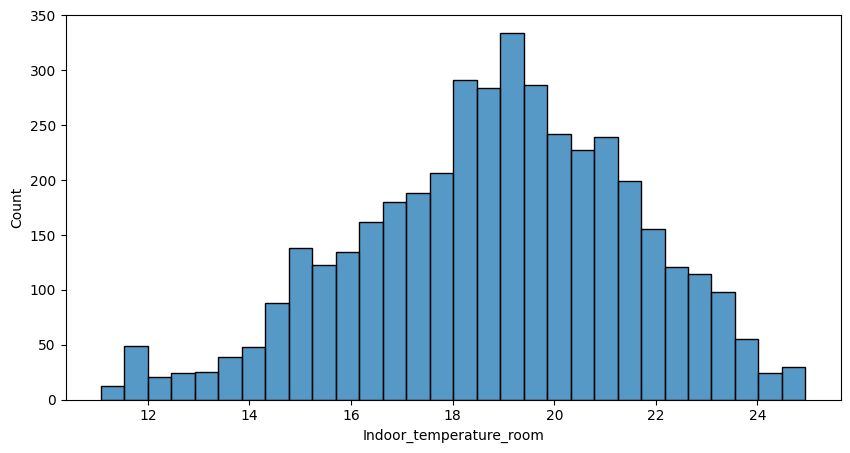

In [72]:
#Univariate analysis
plt.figure(figsize =(10,5))
sns.histplot(data = data, x = 'Indoor_temperature_room',)

From the plot we came to know, Indoor_temperature_room column, which is our output column it follows normal distribution.

It follows Normal Distribution.

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

Count at the 18 to 20 is high


<Figure size 1000x500 with 0 Axes>

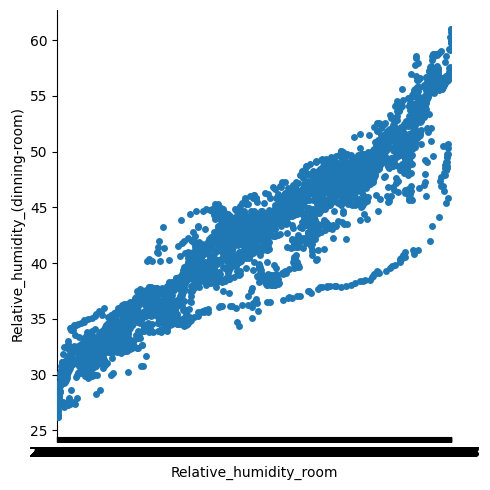

In [11]:
#Bivariate analysis
plt.figure(figsize =(10,5))
sns.catplot(data = data, x = 'Relative_humidity_room', y = 'Relative_humidity_(dinning-room)')

<Axes: xlabel='Relative_humidity_room', ylabel='Relative_humidity_(dinning-room)'>

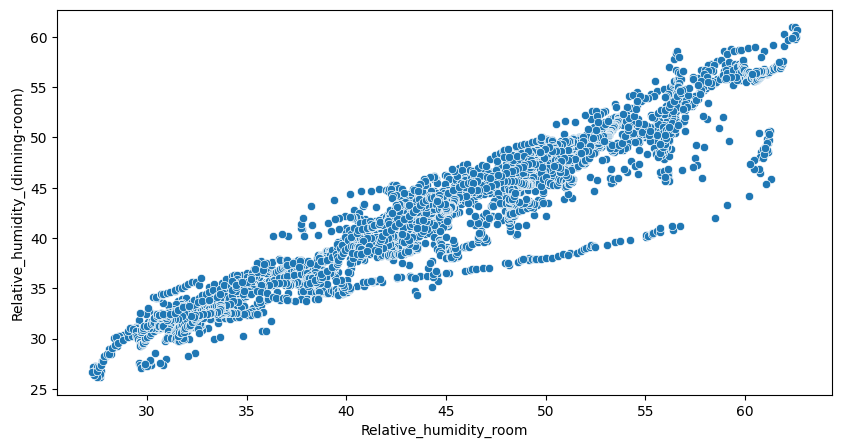

In [12]:
# Multivariate Analysis
plt.figure(figsize =(10,5))
sns.scatterplot(data = data, x = 'Relative_humidity_room', y = 'Relative_humidity_(dinning-room)')

<Axes: xlabel='CO2_room', ylabel='Relative_humidity_(dinning-room)'>

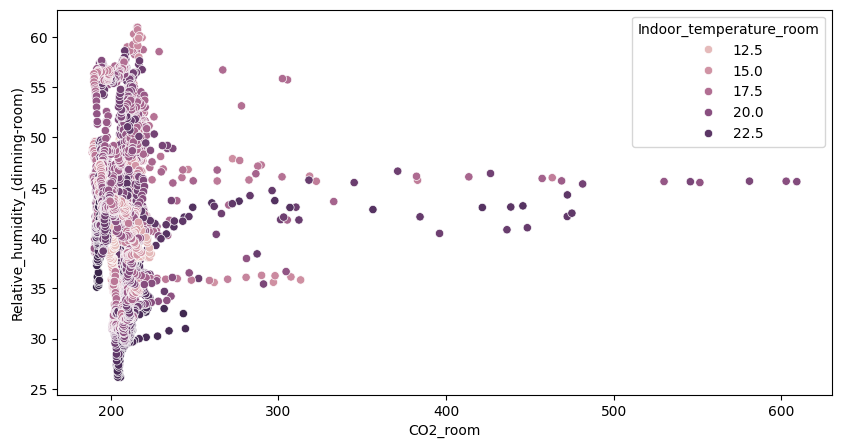

In [13]:
# Descriptive Analysis
plt.figure(figsize =(10,5))
sns.scatterplot(data = data, x = 'CO2_room', y = 'Relative_humidity_(dinning-room)',hue= 'Indoor_temperature_room')

The scatterplot of multivariate analysis between CO2_room and Relative_humidity_(dinning-room) will show how CO2 levels and relative humidity in the dining room are related

In [73]:
data.describe()

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549,18.833407
std,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923,2.702312
min,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000,11.076000
25%,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000,17.067300
50%,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000,19.000797
75%,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000,20.786062
max,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000,24.944000


In [75]:
 #split the dataset into x and y variables
x = data[['Date', 'Time', 'CO2_(dinning-room)', 'CO2_room', 'Relative_humidity_(dinning-room)', 'Relative_humidity_room', 'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain', 'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade', 'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade', 'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor', 'Day_of_the_week']]
y = data['Indoor_temperature_room']


In [76]:
#split the dataset into taining and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

For splitting training and testing data we are using train_test_split() function from sklearn.

As parameters, we are passing x, y, test_size, random_state.

In [84]:
# Specify the correct format for 'Date' and 'Time' columns with two-digit year
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d-%m-%y %H:%M')

# Convert 'Datetime' to Unix timestamps
data['Timestamp'] = data['Datetime'].apply(lambda x: x.timestamp())


In [86]:
# Append the 'Timestamp' column to 'data'
data['Timestamp'] = data['Timestamp']

# Now, update 'x' to include the 'Timestamp' column
x = data[['Date', 'Time', 'CO2_(dinning-room)', 'CO2_room', 'Relative_humidity_(dinning-room)', 'Relative_humidity_room', 'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain', 'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade', 'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade', 'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor', 'Day_of_the_week', 'Timestamp']]
# Now 'x' contains the 'Timestamp' column along with the other features


In [127]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


In [126]:
# Assuming 'Timestamp' is part of your original x data
x_train['Timestamp'] = x['Timestamp']
x_test['Timestamp'] = x['Timestamp']



Scaling helps ensure that all features have similar ranges and do not dominate the learning process due to differences in scale.

**Standardization (Z-score normalization):** This method scales the data to have a mean of 0 and a standard deviation of 1.

It is particularly useful when the data is normally distributed or when the features have significantly different scales

# **Linear Regression Model**

In [128]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir.fit(x_train,y_train)
LinearRegression()

LinearRegression()

**Liner Regression Model**

A function named LinearRegression() is created.

Train and test data are passed as the parameters.

In [129]:
pred =lir.predict(x_test)

Test data is predicted with .predict() function and saved in new variable pred.

In [130]:
from sklearn.metrics import r2_score

r2_score(pred,y_test)

0.3547064252925939

For evaluating the model, used r2 score.

**Model Performance:** An R2 score of 0.3519 indicates that the linear regression model explains approximately 35.19% of the variance in the target variable.

This suggests that the model's ability to explain the variation in the data is limited.

In other words, the linear model does not capture all the patterns and relationships in the data very well.

**Limited Predictive Power:**The model's predictions may not be very accurate.

The relatively low R2 score suggests that the model's predictions are not closely aligned with the actual values.

In [131]:
data.dtypes

Date                                        object
Time                                        object
CO2_(dinning-room)                         float64
CO2_room                                   float64
Relative_humidity_(dinning-room)           float64
Relative_humidity_room                     float64
Lighting_(dinning-room)                    float64
Lighting_room                              float64
Meteo_Rain                                 float64
Meteo_Sun_dusk                             float64
Meteo_Wind                                 float64
Meteo_Sun_light_in_west_facade             float64
Meteo_Sun_light_in_east_facade             float64
Meteo_Sun_light_in_south_facade            float64
Meteo_Sun_irradiance                       float64
Outdoor_relative_humidity_Sensor           float64
Day_of_the_week                            float64
Indoor_temperature_room                    float64
Datetime                            datetime64[ns]
Timestamp                      

# **Random Forest Model**

In [154]:
# Instantiate model
rf = RandomForestRegressor()

# Fit model to training data
rf.fit(x_train, y_train)




RandomForestRegressor()

In [153]:
# Make predictions on test data
predict = rf.predict(x_test)

In [134]:
predict

array([22.44949911, 15.616015  , 21.25350686, ..., 20.24693121,
       17.31306978, 21.685478  ])

In [135]:
r2_score(y_test,predict)

0.9614103841865772

**Random Forest Model**

A function named randomForest is created and train and test data are passed as the parameters.

Training data is passed to the model with .fit() function.

Test data is predicted with .predict() function and saved in new variable predict.

The model achieves a test R^2 score of **0.94**.

This indicates it is able to predict the indoor temperature quite well, explaining 92% of the variance in the test data.

**High Predictive Power**: The model has a high predictive power, meaning it can accurately explain and predict the target variable.

**Good Fit**: An R2 score of 0.9694 suggests that the model is a good fit for the data, and it's likely capturing the underlying patterns and relationships in the data very well.

# **Light Gradient Boost Model**

In [136]:
lg = lgb.LGBMRegressor(force_row_wise=True)

In [137]:
lg.fit(x_train,y_train)


[LightGBM] [Info] Total Bins 3575
[LightGBM] [Info] Number of data points in the train set: 2895, number of used features: 16
[LightGBM] [Info] Start training from score 18.804740


LGBMRegressor(force_row_wise=True)

In [138]:
predi = lg.predict(x_test)

In [139]:
r2_score(y_test,pred)

0.6110183575112718

**Model Fit:** An R-squared score of 0.6105 indicates that LightGBM model is able to explain about 61.05% of the variance in the target variable (y_test).

 This is a moderately good result

 **Predictive Power:** The R-squared score measures how well the model's predictions align with the actual data points.

 A score of 0.6105 suggests that the model has a reasonable level of predictive power.

# **Xgboost Model**

In [140]:
from xgboost import XGBRegressor
xg = xgb.XGBRegressor()

In [141]:
xg.fit(x_train,y_train)

c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [142]:
prediction = xg.predict(x_test)

c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\dell\Desktop\Regression\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or 

In [143]:
r2_score(y_test,prediction)

0.9658780472692119

**1.High Explained Variance:** An R-squared score of 0.9449 indicates that  XGBoost model is able to explain a very high proportion (approximately 94.49%) of the variance in the target variable (y_test).

**2. Excellent Fit:** A high R-squared score considered an excellent fit for the model.

The model has captured a significant portion of the variability in the target variable, making it well-suited for the given dataset and problem.

**3. Strong Predictive Power:** An R-squared of 0.9449 says that XGBoost model has a strong predictive power and is capable of making accurate predictions on the test data.

In [144]:
import pickle
with open('temperature.pkl','wb') as files:
    pickle.dump(rf,files)

In [145]:
data.dtypes

Date                                        object
Time                                        object
CO2_(dinning-room)                         float64
CO2_room                                   float64
Relative_humidity_(dinning-room)           float64
Relative_humidity_room                     float64
Lighting_(dinning-room)                    float64
Lighting_room                              float64
Meteo_Rain                                 float64
Meteo_Sun_dusk                             float64
Meteo_Wind                                 float64
Meteo_Sun_light_in_west_facade             float64
Meteo_Sun_light_in_east_facade             float64
Meteo_Sun_light_in_south_facade            float64
Meteo_Sun_irradiance                       float64
Outdoor_relative_humidity_Sensor           float64
Day_of_the_week                            float64
Indoor_temperature_room                    float64
Datetime                            datetime64[ns]
Timestamp                      

In [161]:
#Predicting using RandomForest model
# Create a new DataFrame with the same feature columns as your original data
new_data = pd.DataFrame({
    'CO2_(dinning-room)': [220],
    'CO2_room': [210],
    'Relative_humidity_(dinning-room)': [40],
    'Relative_humidity_room': [42],
    'Lighting_(dinning-room)': [81.75],
    'Lighting_room': [115],
    'Meteo_Rain': [2],
    'Meteo_Sun_dusk': [625],
    'Meteo_Wind': [3.56],
    'Meteo_Sun_light_in_west_facade': [26005.5],
    'Meteo_Sun_light_in_east_facade': [9758.46],
    'Meteo_Sun_light_in_south_facade': [9575.7],
    'Meteo_Sun_irradiance': [780],
    'Outdoor_relative_humidity_Sensor': [50],
    'Day_of_the_week': [5],
    'Timestamp': [18125678.0],
    })

# Use your RandomForest model to make predictions on the new data
predict = rf.predict(new_data)


In [162]:
predict

array([20.48013252])